## 각 지역의 특징 추출을 위한 Factor Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_for_test = pd.read_excel("final_data.xlsx")
data_for_test.index = data_for_test["Unnamed: 0"]
data_for_test.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
data_for_test.head()

,걷기실천율,비만유병률,보건기관이용률,인플루엔자_예방접종률,우울감_경험률,흡연율,의료인력현황,병·의원_도보대중교통_30분_이내_pop_ratio,65_pop,독거노인가구비율,...,청년고용률_2022.1/2,재정자립도(세입과목개편후),녹지율,1인당생활폐기물,인구십만명당_문화기반시설수,도로포장률,철도역_도보대중교통_30분_이내_pop_ratio,통근통학1시간미만,순이동_2021,화재발생건수
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
서울종로구,0.480759,-0.514740,-0.395576,-1.401052,-0.454929,-0.644873,2.075486,0.857058,-0.613152,-0.698624,...,0.128031,2.438759,-0.840868,0.492846,3.216808,0.696021,1.215581,0.205112,0.244509,0.327889
서울중구,1.432056,-1.567905,-0.804652,0.727179,0.906598,-0.678899,0.442752,0.857058,-0.549880,-0.578010,...,0.102985,3.145286,-3.030223,1.923121,1.152817,0.696021,1.447377,0.383772,-0.139544,0.124166
서울용산구,1.289362,-2.410437,-0.686649,-0.096005,0.159954,-0.508766,-0.013584,0.857058,-0.759840,-0.905389,...,0.679044,1.959018,-1.128135,-0.157279,-0.397469,0.696021,1.447377,0.604819,0.324813,0.172671
서울성동구,1.051537,-1.014993,-1.040658,0.486248,0.906598,-1.325407,0.299036,0.857058,-0.805175,-0.991541,...,0.378492,1.217601,-1.827938,-0.547354,-0.617628,0.696021,1.447377,1.032386,0.734938,0.318188
서울광진구,1.479621,-1.436259,-1.079992,-0.096005,0.511316,-1.019166,0.553873,0.857058,-0.936692,-1.112154,...,1.154919,0.598299,-1.587293,-0.547354,-0.801094,0.696021,1.443019,0.666519,0.253198,0.454004


### 1차 시도
- 전반적으로 변수들이 잘 골라졌는지
- 어떤 변수가 필터링될지

1. 사전 검증 작업 : 쓸만한 데이터인지

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(data_for_test)

print(f"KMO measure: {kmo_model}")

###0.91182로 높은 적합성. 변수들을 합치기 적합.

KMO measure: 0.9118197634072237


c:\Users\Popperkim\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [5]:
from factor_analyzer import calculate_bartlett_sphericity

chi_square, p_value = calculate_bartlett_sphericity(data_for_test)
print("Chi-square value:", chi_square)
print("P-value:", p_value)

###구형성 검정 시 요인분석,주성분분석을 하기에 적합하다는 결과 도출

Chi-square value: 9935.59334029755
P-value: 0.0


2. Principal Components Analysis

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(data_for_test)
msa = pca.get_precision()
msa_diagonal = list(np.diagonal(msa))
pca_components = pca.fit_transform(data_for_test)

In [7]:
pca_result = pca.components_

In [8]:
pd.DataFrame(pca_result.T, index=data_for_test.columns)

,0,1,2,3,4
걷기실천율,-0.148950,0.127346,0.003198,0.056120,-0.013377
비만유병률,0.101912,-0.324765,0.066992,0.037443,-0.075529
보건기관이용률,0.218672,0.034163,0.066631,0.028063,0.028047
인플루엔자_예방접종률,-0.002532,-0.132463,0.110409,-0.084055,0.315455
우울감_경험률,-0.062847,-0.164427,0.103988,0.045306,-0.186407
흡연율,0.100882,-0.310265,0.034183,0.141185,-0.218917
의료인력현황,-0.179910,0.169887,0.194413,-0.161357,-0.163720
병·의원_도보대중교통_30분_이내_pop_ratio,-0.227874,-0.084982,-0.124215,-0.050053,0.016040
65_pop,0.218187,0.128319,-0.101081,-0.010844,-0.115597
독거노인가구비율,0.221703,0.089496,-0.112837,-0.057695,-0.112073


In [9]:
msa_diagonal_data = pd.DataFrame({"msa" : msa_diagonal}, index=data_for_test.columns)

In [10]:
msa_diagonal_data
##주성분 분석의 MSA : "the amount of variance in the variable that is explained by the extracted principal components"

,msa
걷기실천율,2.266276
비만유병률,2.099419
보건기관이용률,2.232294
인플루엔자_예방접종률,2.107964
우울감_경험률,2.206401
흡연율,2.015399
의료인력현황,2.053756
병·의원_도보대중교통_30분_이내_pop_ratio,2.186987
65_pop,2.169915
독거노인가구비율,2.173768


In [11]:
pca.explained_variance_ratio_
##분산 설명

array([0.40523595, 0.06900967, 0.06037618, 0.05133472, 0.04134839])

3. Factor Analysis

In [12]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=3, method='ml', rotation='varimax')
fa.fit(data_for_test)

communalities = fa.get_communalities()
loadings = fa.loadings_
spa = fa.get_uniquenesses()

In [13]:
pd.DataFrame({"Communalities" : communalities, "special" : spa}, index=data_for_test.columns)
###Communalities : the proportion of variance in an observed variable that is explained by the common factors
###MSA로 해석. 각 변수의 적합성에 대한 검정

,Communalities,special
걷기실천율,0.373905,0.626095
비만유병률,0.356717,0.643283
보건기관이용률,0.778567,0.221433
인플루엔자_예방접종률,0.019421,0.980579
우울감_경험률,0.081780,0.918220
흡연율,0.363353,0.636647
의료인력현황,0.862191,0.137809
병·의원_도보대중교통_30분_이내_pop_ratio,0.943538,0.056462
65_pop,0.836707,0.163293
독거노인가구비율,0.821029,0.178971


In [14]:
pd.DataFrame(loadings, index = data_for_test.columns)

,0,1,2
걷기실천율,-0.536009,0.245636,-0.162056
비만유병률,0.381051,-0.197807,0.415198
보건기관이용률,0.824496,-0.302336,-0.085835
인플루엔자_예방접종률,-0.006423,-0.006503,0.139060
우울감_경험률,-0.179266,0.143088,0.170790
흡연율,0.359256,-0.232550,0.424510
의료인력현황,-0.458499,0.796918,-0.129961
병·의원_도보대중교통_30분_이내_pop_ratio,-0.926995,0.221820,0.187123
65_pop,0.804327,-0.355297,-0.252049
독거노인가구비율,0.810595,-0.368202,-0.168499


### 2차 시도
- 지역 마이너스 지수 도출 위한 핵심 변수 추려서 그것만으로 진행
- 이전 결과 참고

In [15]:
data_for_pca2 = data_for_test[['걷기실천율','65_pop','독거노인가구비율','노후주택비율','빈집비율','재정자립도(세입과목개편후)']]

- 검정

In [16]:
from factor_analyzer import calculate_bartlett_sphericity

chi_square_p, p_value_p = calculate_bartlett_sphericity(data_for_pca2)
print("Chi-square value:", chi_square_p)
print("P-value:", p_value_p)

Chi-square value: 1488.6621572746678
P-value: 1.378069295410532e-308


In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all_p, kmo_model_p = calculate_kmo(data_for_pca2)

print(f"KMO measure: {kmo_model_p}")

KMO measure: 0.8257268946238021


- 실행

In [18]:
pca2 = PCA(n_components=5)
pca2.fit(data_for_pca2)
msa2 = pca2.get_precision()
msa_diagonal2 = list(np.diagonal(msa2))

In [19]:
msa_diagonal_data2 = pd.DataFrame({"msa" : msa_diagonal2}, index=data_for_pca2.columns)

In [20]:
msa_diagonal_data2

,msa
걷기실천율,1.598004
65_pop,27.830146
독거노인가구비율,35.512119
노후주택비율,3.852847
빈집비율,2.589761
재정자립도(세입과목개편후),2.322781


In [21]:
pd.DataFrame(pca2.components_.T, index=data_for_pca2.columns)

,0,1,2,3,4
걷기실천율,-0.303980,0.791163,0.353439,0.390049,-0.065775
65_pop,0.457420,0.203526,0.133938,-0.234179,-0.499318
독거노인가구비율,0.466357,0.153010,0.165448,-0.189648,-0.361272
노후주택비율,0.413429,0.419307,-0.093544,-0.317432,0.735848
빈집비율,0.386078,-0.352280,0.662332,0.462617,0.263023
재정자립도(세입과목개편후),-0.401116,-0.096475,0.618332,-0.665040,0.072005


In [22]:
pca_re2 = pd.DataFrame(pca2.transform(data_for_pca2))

In [23]:
pca2.explained_variance_ratio_

array([0.70959484, 0.13395909, 0.06914137, 0.0557693 , 0.02880502])

- 데이터 Merge

In [24]:
data_for_test['Regional_minus'] = pca_re2[0]

In [25]:
data_for_test.head()

,걷기실천율,비만유병률,보건기관이용률,인플루엔자_예방접종률,우울감_경험률,흡연율,의료인력현황,병·의원_도보대중교통_30분_이내_pop_ratio,65_pop,독거노인가구비율,...,재정자립도(세입과목개편후),녹지율,1인당생활폐기물,인구십만명당_문화기반시설수,도로포장률,철도역_도보대중교통_30분_이내_pop_ratio,통근통학1시간미만,순이동_2021,화재발생건수,Regional_minus
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
서울종로구,0.480759,-0.514740,-0.395576,-1.401052,-0.454929,-0.644873,2.075486,0.857058,-0.613152,-0.698624,...,2.438759,-0.840868,0.492846,3.216808,0.696021,1.215581,0.205112,0.244509,0.327889,NaN
서울중구,1.432056,-1.567905,-0.804652,0.727179,0.906598,-0.678899,0.442752,0.857058,-0.549880,-0.578010,...,3.145286,-3.030223,1.923121,1.152817,0.696021,1.447377,0.383772,-0.139544,0.124166,NaN
서울용산구,1.289362,-2.410437,-0.686649,-0.096005,0.159954,-0.508766,-0.013584,0.857058,-0.759840,-0.905389,...,1.959018,-1.128135,-0.157279,-0.397469,0.696021,1.447377,0.604819,0.324813,0.172671,NaN
서울성동구,1.051537,-1.014993,-1.040658,0.486248,0.906598,-1.325407,0.299036,0.857058,-0.805175,-0.991541,...,1.217601,-1.827938,-0.547354,-0.617628,0.696021,1.447377,1.032386,0.734938,0.318188,NaN
서울광진구,1.479621,-1.436259,-1.079992,-0.096005,0.511316,-1.019166,0.553873,0.857058,-0.936692,-1.112154,...,0.598299,-1.587293,-0.547354,-0.801094,0.696021,1.443019,0.666519,0.253198,0.454004,NaN


In [26]:
data_for_test.to_excel("incluepca.xlsx") ##저장

In [27]:
pd.DataFrame(np.corrcoef(data_for_pca2.T),index=['걷기실천율','65_pop','독거노인가구비율','노후주택비율','빈집비율','재정자립도(세입과목개편후)'],columns=['걷기실천율','65_pop','독거노인가구비율','노후주택비율','빈집비율','재정자립도(세입과목개편후)'])

,걷기실천율,65_pop,독거노인가구비율,노후주택비율,빈집비율,재정자립도(세입과목개편후)
걷기실천율,1.000000,-0.468005,-0.502451,-0.331953,-0.569200,0.460828
65_pop,-0.468005,1.000000,0.980440,0.830430,0.672865,-0.716691
독거노인가구비율,-0.502451,0.980440,1.000000,0.839641,0.722063,-0.728164
노후주택비율,-0.331953,0.830430,0.839641,1.000000,0.519514,-0.682758
빈집비율,-0.569200,0.672865,0.722063,0.519514,1.000000,-0.561796
재정자립도(세입과목개편후),0.460828,-0.716691,-0.728164,-0.682758,-0.561796,1.000000


### 3차 시도
#### - 큰틀의 방향성
- 연속적인 FA를 통해 설명 분산이 떨어지는 변수를 걸러내기
- 연관성이 있는 것은 지역 해악의 여러 요인으로 골라내기
- 연관성이 떨어지는 변수를 통제변수로 설정하는 것 고려

1. 1차 시도의 FA에서 Communalities 0.5 기준으로 걸러서 진행

In [28]:
data_for_test.columns

Index(['걷기실천율', '비만유병률', '보건기관이용률', '인플루엔자_예방접종률', '우울감_경험률', '흡연율', '의료인력현황',
       '병·의원_도보대중교통_30분_이내_pop_ratio', '65_pop', '독거노인가구비율', '대졸자합',
       '노인천명당 노인여가복지시설수', '유아천명당 보육시설수', '사회복지예산비중', '천명당의료기관병상수',
       '중학교_도보대중교통_30분_이내_pop_ratio', '고등학교_도보대중교통_30분_이내_pop_ratio',
       '초등학교_도보대중교통_30분_이내_pop_ratio', 'A.농업,임업및어업_pop', 'C.제조업_pop',
       '첨단산업_pop', '공공기관_pop', '농업어업임업_부가가치', '제조업_부가가치', '생활서비스업_부가가치',
       '특허3개년평균', '1인당_자동차등록대수', '사업체수', '노후주택비율', '빈집비율', '실업률',
       '청년고용률_2022.1/2', '재정자립도(세입과목개편후)', '녹지율', '1인당생활폐기물', '인구십만명당_문화기반시설수',
       '도로포장률', '철도역_도보대중교통_30분_이내_pop_ratio', '통근통학1시간미만', '순이동_2021',
       '화재발생건수', 'Regional_minus'],
      dtype='object')

In [29]:
data_for_test2 = data_for_test[['보건기관이용률','의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio','65_pop','독거노인가구비율','대졸자합','노인천명당 노인여가복지시설수','사회복지예산비중','중학교_도보대중교통_30분_이내_pop_ratio','고등학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio','A.농업,임업및어업_pop','C.제조업_pop','첨단산업_pop','사업체수','특허3개년평균','노후주택비율','빈집비율','실업률','재정자립도(세입과목개편후)','화재발생건수']]

In [30]:
## 적합성 검정
from factor_analyzer import calculate_bartlett_sphericity

chi_square_p, p_value_p = calculate_bartlett_sphericity(data_for_test2)
print("Chi-square value:", chi_square_p)
print("P-value:", p_value_p)

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all_p, kmo_model_p = calculate_kmo(data_for_test2)

print(f"KMO measure: {kmo_model_p}")

Chi-square value: 7306.811168987669
P-value: 0.0
KMO measure: 0.9283015316283385


c:\Users\Popperkim\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


- 변수 걸러내기

In [31]:
from factor_analyzer import FactorAnalyzer

fac2 = FactorAnalyzer(n_factors=3, method='ml', rotation='varimax')
fac2.fit(data_for_test2)

communalities2 = fac2.get_communalities()
loadings2 = fac2.loadings_
spa2 = fac2.get_uniquenesses()

In [32]:
pd.DataFrame({"communalities" :communalities2, "uniqueness" : spa2 }, index=data_for_test2.columns)

,communalities,uniqueness
보건기관이용률,0.764695,0.235305
의료인력현황,0.829690,0.170310
병·의원_도보대중교통_30분_이내_pop_ratio,0.954372,0.045628
65_pop,0.967639,0.032361
독거노인가구비율,0.995060,0.004940
대졸자합,0.540398,0.459602
노인천명당 노인여가복지시설수,0.789376,0.210624
사회복지예산비중,0.678450,0.321550
중학교_도보대중교통_30분_이내_pop_ratio,0.914758,0.085242
고등학교_도보대중교통_30분_이내_pop_ratio,0.865494,0.134506


2. 위의 결과를 근거로 또 다시

In [33]:
data_for_test3 = data_for_test[['보건기관이용률','의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio','65_pop','독거노인가구비율','대졸자합','노인천명당 노인여가복지시설수','사회복지예산비중','중학교_도보대중교통_30분_이내_pop_ratio','고등학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio','A.농업,임업및어업_pop','사업체수','노후주택비율','빈집비율','실업률','재정자립도(세입과목개편후)','화재발생건수']]

In [34]:
## 검정

from factor_analyzer import calculate_bartlett_sphericity

chi_square_p, p_value_p = calculate_bartlett_sphericity(data_for_test3)
print("Chi-square value:", chi_square_p)
print("P-value:", p_value_p)

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all_p, kmo_model_p = calculate_kmo(data_for_test3)

print(f"KMO measure: {kmo_model_p}")

Chi-square value: 6490.712134871627
P-value: 0.0
KMO measure: 0.9310770208446071


c:\Users\Popperkim\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [35]:
from factor_analyzer import FactorAnalyzer

fac3 = FactorAnalyzer(n_factors=5, method='ml', rotation='varimax')
fac3.fit(data_for_test3)

communalities3 = fac3.get_communalities()
loadings3 = fac3.loadings_
spa3 = fac3.get_uniquenesses()

In [36]:
pd.DataFrame({"communalities" :communalities3, "uniqueness" : spa3 }, index=data_for_test3.columns)

## 더 이상 걸러지는 것 없음을 확인

,communalities,uniqueness
보건기관이용률,0.782604,0.217396
의료인력현황,0.861712,0.138288
병·의원_도보대중교통_30분_이내_pop_ratio,0.957269,0.042731
65_pop,0.979654,0.020346
독거노인가구비율,0.995132,0.004868
대졸자합,0.645581,0.354419
노인천명당 노인여가복지시설수,0.867675,0.132325
사회복지예산비중,0.787188,0.212812
중학교_도보대중교통_30분_이내_pop_ratio,0.946350,0.053650
고등학교_도보대중교통_30분_이내_pop_ratio,0.872436,0.127564


- 각 변수 간 상관관계 확인

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

import seaborn as sns
cor_mat = data_for_test3.iloc[:,0:].corr()
plt.figure(figsize=(100, 100))
sns.heatmap(cor_mat, annot=True, cmap='RdYlGn_r')
plt.show()

In [38]:
cor_mat

,보건기관이용률,의료인력현황,병·의원_도보대중교통_30분_이내_pop_ratio,65_pop,독거노인가구비율,대졸자합,노인천명당 노인여가복지시설수,사회복지예산비중,중학교_도보대중교통_30분_이내_pop_ratio,고등학교_도보대중교통_30분_이내_pop_ratio,초등학교_도보대중교통_30분_이내_pop_ratio,"A.농업,임업및어업_pop",사업체수,노후주택비율,빈집비율,실업률,재정자립도(세입과목개편후),화재발생건수
보건기관이용률,1.000000,-0.599545,-0.854178,0.768883,0.780862,-0.662295,0.806845,-0.770015,-0.797535,-0.781506,-0.769012,0.808382,-0.634249,0.646342,0.668912,0.779323,-0.620359,-0.531881
의료인력현황,-0.599545,1.000000,0.586719,-0.581674,-0.599532,0.689721,-0.563810,0.562652,0.549053,0.554367,0.509063,-0.555985,0.903549,-0.463503,-0.586800,-0.488890,0.658481,0.724911
병·의원_도보대중교통_30분_이내_pop_ratio,-0.854178,0.586719,1.000000,-0.860462,-0.841154,0.667842,-0.823830,0.799581,0.939403,0.904193,0.921220,-0.882742,0.624228,-0.664202,-0.633882,-0.842456,0.610699,0.511279
65_pop,0.768883,-0.581674,-0.860462,1.000000,0.980440,-0.646138,0.804560,-0.663610,-0.801619,-0.744892,-0.838868,0.888338,-0.676485,0.830430,0.672865,0.635023,-0.716691,-0.604527
독거노인가구비율,0.780862,-0.599532,-0.841154,0.980440,1.000000,-0.695742,0.849657,-0.678418,-0.777349,-0.725456,-0.816577,0.893250,-0.680154,0.839641,0.722063,0.640794,-0.728164,-0.591650
대졸자합,-0.662295,0.689721,0.667842,-0.646138,-0.695742,1.000000,-0.669903,0.618413,0.626529,0.628335,0.601386,-0.669090,0.589931,-0.528777,-0.636072,-0.632703,0.642856,0.393732
노인천명당 노인여가복지시설수,0.806845,-0.563810,-0.823830,0.804560,0.849657,-0.669903,1.000000,-0.764265,-0.779028,-0.749457,-0.802239,0.901726,-0.584130,0.634967,0.699279,0.780754,-0.577659,-0.433778
사회복지예산비중,-0.770015,0.562652,0.799581,-0.663610,-0.678418,0.618413,-0.764265,1.000000,0.750836,0.757641,0.695603,-0.759634,0.534694,-0.478474,-0.704328,-0.787182,0.421173,0.338693
중학교_도보대중교통_30분_이내_pop_ratio,-0.797535,0.549053,0.939403,-0.801619,-0.777349,0.626529,-0.779028,0.750836,1.000000,0.905276,0.935035,-0.835240,0.583649,-0.601474,-0.580810,-0.806688,0.569172,0.474074
고등학교_도보대중교통_30분_이내_pop_ratio,-0.781506,0.554367,0.904193,-0.744892,-0.725456,0.628335,-0.749457,0.757641,0.905276,1.000000,0.857402,-0.791606,0.571811,-0.582000,-0.570452,-0.817723,0.547394,0.444260


상관관계 기반으로 부호 처리

In [39]:
data_for_test3[['의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio','대졸자합','사회복지예산비중','중학교_도보대중교통_30분_이내_pop_ratio','고등학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio','사업체수', '재정자립도(세입과목개편후)', '화재발생건수']] = -data_for_test3[['의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio','대졸자합','사회복지예산비중','중학교_도보대중교통_30분_이내_pop_ratio','고등학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio','사업체수','재정자립도(세입과목개편후)', '화재발생건수']]

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [40]:
data_for_test3.to_excel("data_for_FA.xlsx")

- Varimax

In [41]:
from factor_analyzer import FactorAnalyzer

fac4 = FactorAnalyzer(n_factors=10, method='principal', rotation='varimax')
fac4.fit(data_for_test3)

communalities4 = fac4.get_communalities()
loadings4 = fac4.loadings_
spa4 = fac4.get_uniquenesses()

In [42]:
## FA의 결과
pd.DataFrame(loadings4, index = data_for_test3.columns)

,0,1,2,3,4,5,6,7,8,9
보건기관이용률,0.620282,0.303176,0.271628,0.236843,0.193045,0.125736,0.050567,0.128480,0.152843,0.538715
의료인력현황,0.263501,0.796403,0.049600,0.185858,0.394815,0.087406,-0.024223,0.106020,0.200246,-0.012113
병·의원_도보대중교통_30분_이내_pop_ratio,0.832279,0.269573,0.300285,0.176175,0.164322,0.105441,-0.018085,0.088215,0.112485,0.122896
65_pop,0.569848,0.322858,0.605284,0.247299,0.141706,0.142567,-0.153444,0.216885,0.027825,0.045377
독거노인가구비율,0.519325,0.311353,0.609104,0.301039,0.204750,0.142710,-0.115068,0.268807,0.042350,0.068156
대졸자합,0.385035,0.266127,0.216822,0.228112,0.789654,0.152125,0.036212,0.089306,0.071349,0.078471
노인천명당 노인여가복지시설수,0.609610,0.212205,0.309811,0.288316,0.205974,0.093526,0.076386,0.500325,0.147854,0.142333
사회복지예산비중,0.632566,0.191248,0.143213,0.352922,0.170690,-0.010465,0.048479,0.126357,0.575147,0.124931
중학교_도보대중교통_30분_이내_pop_ratio,0.886112,0.250078,0.220436,0.142824,0.142273,0.109478,-0.078746,0.033481,0.044991,0.062866
고등학교_도보대중교통_30분_이내_pop_ratio,0.858957,0.240437,0.202384,0.133228,0.171859,0.125204,0.048791,-0.075525,0.155013,0.037043


In [43]:
fac4._get_factor_variance(loadings4)[0]

array([6.42993845, 3.30870669, 2.47661428, 1.43561994, 1.25570339,
       0.69749203, 0.25246779, 0.68265003, 0.53508766, 0.40642069])

In [44]:
fac4.get_eigenvalues()[0]

array([1.25610942e+01, 1.68769207e+00, 8.98122596e-01, 7.02235212e-01,
       4.56039467e-01, 2.83176341e-01, 2.75689250e-01, 2.55800308e-01,
       1.88990777e-01, 1.71860728e-01, 1.33960858e-01, 1.07497173e-01,
       8.99448309e-02, 6.12150509e-02, 4.11478084e-02, 3.95449586e-02,
       3.62830514e-02, 9.70530718e-03])

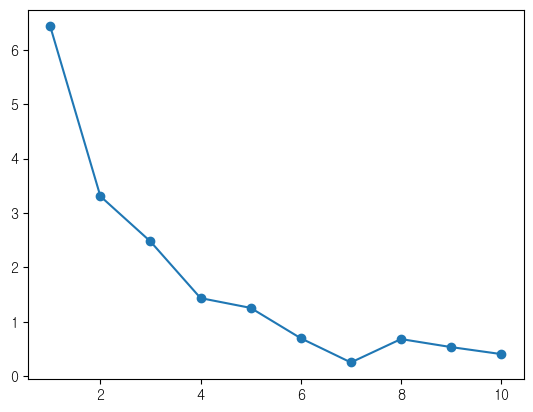

In [45]:
plt.plot(range(1,11), fac4.get_factor_variance()[0],"-o")

In [46]:
pd.DataFrame(fac4.get_factor_variance()[1])

,0
0,0.357219
1,0.183817
2,0.137590
3,0.079757
4,0.069761
5,0.038750
6,0.014026
7,0.037925
8,0.029727
9,0.022579


In [47]:
minus_factors = pd.DataFrame(fac4.transform(data_for_test3)[:,0:4], index=data_for_test.index, columns= ["factor1","factor2","factor3","factor4"])

In [48]:
minus_factors.head()

,factor1,factor2,factor3,factor4
Unnamed: 0,,,,
서울종로구,-0.347950,-0.623500,1.079451,-0.406914
서울중구,-0.266268,-0.139877,0.374633,-0.626562
서울용산구,-0.471037,0.715791,0.338059,-0.437574
서울성동구,-0.367326,0.260370,-0.441191,-1.218430
서울광진구,-0.394529,0.152392,-0.418142,-1.604564


In [49]:
minus_factors.to_excel("factors.xlsx") ##결과 저장

- Equamax

In [50]:
fac5 = FactorAnalyzer(n_factors=10, method='principal', rotation='equamax')
fac5.fit(data_for_test3)

communalities5 = fac5.get_communalities()
loadings5 = fac5.loadings_
spa5 = fac5.get_uniquenesses()

In [51]:
## FA의 결과
pd.DataFrame(loadings5, index = data_for_test3.columns)

,0,1,2,3,4,5,6,7,8,9
보건기관이용률,0.884160,0.079743,-0.011468,0.032018,0.017817,0.011295,0.445246,0.013701,0.053431,0.035649
의료인력현황,0.618377,0.658594,-0.140562,0.068126,0.294195,0.022950,-0.067269,0.023189,0.151380,-0.026349
병·의원_도보대중교통_30분_이내_pop_ratio,0.966164,0.005457,-0.043892,-0.068149,-0.037582,-0.132611,0.020921,-0.031598,0.002499,0.006064
65_pop,0.909896,0.101236,0.244007,0.043014,-0.042929,0.055249,-0.067916,0.055050,-0.098092,-0.220466
독거노인가구비율,0.910384,0.094881,0.254484,0.102919,0.022555,0.128072,-0.047863,0.061637,-0.085222,-0.197682
대졸자합,0.725414,0.098597,-0.001743,0.084405,0.658823,0.002506,0.011648,0.088275,-0.004429,0.016635
노인천명당 노인여가복지시설수,0.907028,-0.025575,-0.038800,0.067128,0.013756,0.337815,0.012186,-0.015888,0.020985,0.026474
사회복지예산비중,0.826750,-0.032177,-0.105305,0.149037,0.010316,-0.008284,0.040845,-0.137405,0.484698,0.047271
중학교_도보대중교통_30분_이내_pop_ratio,0.935149,-0.016156,-0.129913,-0.105550,-0.058549,-0.223722,-0.032190,-0.035089,-0.057277,-0.020932
고등학교_도보대중교통_30분_이내_pop_ratio,0.899542,-0.012467,-0.088858,-0.097876,-0.014254,-0.295911,-0.041345,-0.015443,0.068542,0.108648


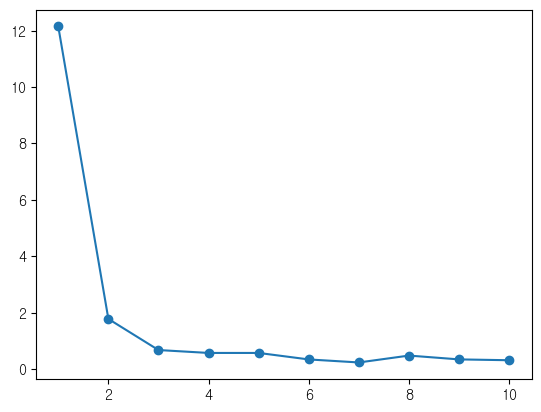

In [52]:
plt.plot(range(1,11),fac5.get_factor_variance()[0], "-o")

In [53]:
pd.DataFrame(fac5.get_factor_variance()[1])

,0
0,0.674946
1,0.098902
2,0.037639
3,0.031927
4,0.031915
5,0.019129
6,0.013177
7,0.026747
8,0.019215
9,0.017554


In [54]:
minus_factors_new = pd.DataFrame(fac5.transform(data_for_test3)[:,0], index=data_for_test.index, columns= ["factor1"])

In [55]:
minus_factors_new.head()

,factor1
Unnamed: 0,
서울종로구,-0.898839
서울중구,-0.933852
서울용산구,-0.957841
서울성동구,-0.977192
서울광진구,-1.029670


In [56]:
minus_factors_new.to_excel("minus_factors_new.xlsx")

PCA

In [57]:
pca3 = PCA(n_components=10)
pca3.fit(data_for_test3)
msa2 = pca3.get_precision()
msa_diagonal3 = list(np.diagonal(msa2))
msa_diagonal_data3 = pd.DataFrame({"msa" : msa_diagonal3}, index=data_for_test3.columns)

In [58]:
pd.DataFrame(pca3.components_.T, index=data_for_test3.columns)

,0,1,2,3,4,5,6,7,8,9
보건기관이용률,0.251016,0.075519,-0.065924,0.015650,0.109349,0.330322,-0.501408,-0.096657,0.018578,-0.677903
의료인력현황,0.206502,-0.361008,-0.424870,0.080600,-0.076875,-0.290247,0.052074,0.125234,0.114353,0.035958
병·의원_도보대중교통_30분_이내_pop_ratio,0.265173,0.160464,0.032963,0.187629,-0.033704,0.079797,0.090507,0.078640,0.029647,-0.102756
65_pop,0.259306,-0.035088,0.319062,-0.098293,0.068936,-0.155800,0.193605,0.096955,0.058795,-0.131751
독거노인가구비율,0.261421,-0.042897,0.276901,-0.214485,0.065515,-0.197340,0.111215,0.052711,0.015934,-0.123694
대졸자합,0.217523,-0.047043,-0.270443,-0.347331,-0.651706,-0.164938,-0.112553,0.260977,-0.234869,-0.155145
노인천명당 노인여가복지시설수,0.250929,0.140247,0.005730,-0.169812,0.125319,-0.382868,-0.184284,-0.401224,0.092214,-0.007183
사회복지예산비중,0.229042,0.215386,-0.313193,-0.083345,0.323371,0.051251,-0.129330,0.330922,0.556971,0.184186
중학교_도보대중교통_30분_이내_pop_ratio,0.253059,0.187842,0.026202,0.291982,-0.108214,0.099938,0.300178,0.065487,0.000428,-0.146876
고등학교_도보대중교통_30분_이내_pop_ratio,0.245569,0.190975,-0.057702,0.287598,-0.136958,0.266407,0.158854,0.224908,0.024866,0.157182


In [59]:
pca3.explained_variance_ratio_

array([0.69783857, 0.09376067, 0.0498957 , 0.03901307, 0.02533553,
       0.01573202, 0.01531607, 0.01421113, 0.01049949, 0.00954782])

### 나이에 의한 영향이 없는지를 검증하기 위한 "노인 인구 관련 변수 제거" 후 진행

In [60]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [61]:
data_for_test2_1 = data_for_test[['걷기실천율', '비만유병률', '보건기관이용률', '인플루엔자_예방접종률', '우울감_경험률', '흡연율', '의료인력현황',
       '병·의원_도보대중교통_30분_이내_pop_ratio', '독거노인가구비율', '대졸자합',
       '노인천명당 노인여가복지시설수', '유아천명당 보육시설수', '사회복지예산비중', '천명당의료기관병상수',
       '중학교_도보대중교통_30분_이내_pop_ratio', '고등학교_도보대중교통_30분_이내_pop_ratio',
       '초등학교_도보대중교통_30분_이내_pop_ratio', 'A.농업,임업및어업_pop', 'C.제조업_pop',
       '첨단산업_pop', '공공기관_pop', '농업어업임업_부가가치', '제조업_부가가치', '생활서비스업_부가가치',
       '특허3개년평균', '1인당_자동차등록대수', '사업체수', '노후주택비율', '빈집비율', '실업률',
       '청년고용률_2022.1/2', '재정자립도(세입과목개편후)', '녹지율', '1인당생활폐기물', '인구십만명당_문화기반시설수',
       '도로포장률', '철도역_도보대중교통_30분_이내_pop_ratio', '통근통학1시간미만', '순이동_2021',
       '화재발생건수']]

In [62]:
## 적합성 검정
from factor_analyzer import calculate_bartlett_sphericity

chi_square_p, p_value_p = calculate_bartlett_sphericity(data_for_test2_1)
print("Chi-square value:", chi_square_p)
print("P-value:", p_value_p)

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all_p, kmo_model_p = calculate_kmo(data_for_test2_1)

print(f"KMO measure: {kmo_model_p}")

Chi-square value: 9034.229060515589
P-value: 0.0
KMO measure: 0.9075924574499581


c:\Users\Popperkim\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


- 변수 걸러내기

In [101]:
from factor_analyzer import FactorAnalyzer

fac_2_1 = FactorAnalyzer(n_factors=5, method='ml', rotation='varimax')
fac_2_1.fit(data_for_test2_1)

communalities2_1 = fac_2_1.get_communalities()
loadings2_1 = fac_2_1.loadings_
spa2_1 = fac_2_1.get_uniquenesses()

In [102]:
pd.DataFrame(fac_2_1.loadings_, index=data_for_test2_1.columns)

,0,1,2,3,4
걷기실천율,0.368502,0.246734,-0.400686,-0.062309,0.088948
비만유병률,-0.136055,-0.172203,0.559748,0.050937,0.041864
보건기관이용률,-0.742767,-0.321482,0.328420,0.086666,-0.079914
인플루엔자_예방접종률,0.052686,-0.008162,0.111995,0.119616,0.225960
우울감_경험률,0.210887,0.145483,0.066208,-0.122276,0.093255
흡연율,-0.117980,-0.210697,0.569293,-0.060319,0.032562
의료인력현황,0.307382,0.800464,-0.372897,-0.061899,-0.033516
병·의원_도보대중교통_30분_이내_pop_ratio,0.898453,0.256462,-0.288117,-0.032769,0.061321
독거노인가구비율,-0.713703,-0.375312,0.231398,0.157906,-0.516034
대졸자합,0.378557,0.344782,-0.760535,-0.116500,0.195483


In [64]:
pd.DataFrame({"communalities" :communalities2_1, "uniqueness" : spa2_1 }, index=data_for_test2_1.columns)

,communalities,uniqueness
걷기실천율,0.373773,0.626227
비만유병률,0.349904,0.650096
보건기관이용률,0.779793,0.220207
인플루엔자_예방접종률,0.012209,0.987791
우울감_경험률,0.075817,0.924183
흡연율,0.357755,0.642245
의료인력현황,0.864142,0.135858
병·의원_도보대중교통_30분_이내_pop_ratio,0.951981,0.048019
독거노인가구비율,0.787320,0.212680
대졸자합,0.878376,0.121624


2. 위의 결과를 근거로 또 다시

In [65]:
data_for_test_2_2 = data_for_test2_1[['보건기관이용률','의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio','독거노인가구비율','대졸자합',
                                      '노인천명당 노인여가복지시설수','사회복지예산비중','특허3개년평균','고등학교_도보대중교통_30분_이내_pop_ratio',
                                      '중학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio','A.농업,임업및어업_pop','C.제조업_pop',
                                      '첨단산업_pop','사업체수','노후주택비율','빈집비율','실업률','재정자립도(세입과목개편후)','화재발생건수']]

In [66]:
## 적합성 검정
from factor_analyzer import calculate_bartlett_sphericity

chi_square_p, p_value_p = calculate_bartlett_sphericity(data_for_test_2_2)
print("Chi-square value:", chi_square_p)
print("P-value:", p_value_p)

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all_p, kmo_model_p = calculate_kmo(data_for_test_2_2)

print(f"KMO measure: {kmo_model_p}")

Chi-square value: 6452.747758200527
P-value: 0.0
KMO measure: 0.9195737570843316


c:\Users\Popperkim\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [67]:
from factor_analyzer import FactorAnalyzer

fac2_2 = FactorAnalyzer(n_factors=5, method='ml', rotation='varimax')
fac2_2.fit(data_for_test_2_2)

communalities2_2 = fac2_2.get_communalities()
loadings2_2 = fac2_2.loadings_
spa2_2 = fac2_2.get_uniquenesses()

In [68]:
pd.DataFrame({"communalities" :communalities2_2, "uniqueness" : spa2_2 }, index=data_for_test_2_2.columns)

## 더 이상 걸러지는 것 없음을 확인

,communalities,uniqueness
보건기관이용률,0.781297,0.218703
의료인력현황,0.881039,0.118961
병·의원_도보대중교통_30분_이내_pop_ratio,0.952124,0.047876
독거노인가구비율,0.985903,0.014097
대졸자합,0.910875,0.089125
노인천명당 노인여가복지시설수,0.871317,0.128683
사회복지예산비중,0.785871,0.214129
특허3개년평균,0.524632,0.475368
고등학교_도보대중교통_30분_이내_pop_ratio,0.867227,0.132773
중학교_도보대중교통_30분_이내_pop_ratio,0.950692,0.049308


In [69]:
pd.options.display.float_format = '{:.2f}'.format
pd.reset_option('display.float_format')

In [70]:
data_for_test_2_2.columns

Index(['보건기관이용률', '의료인력현황', '병·의원_도보대중교통_30분_이내_pop_ratio', '독거노인가구비율', '대졸자합',
       '노인천명당 노인여가복지시설수', '사회복지예산비중', '특허3개년평균',
       '고등학교_도보대중교통_30분_이내_pop_ratio', '중학교_도보대중교통_30분_이내_pop_ratio',
       '초등학교_도보대중교통_30분_이내_pop_ratio', 'A.농업,임업및어업_pop', 'C.제조업_pop',
       '첨단산업_pop', '사업체수', '노후주택비율', '빈집비율', '실업률', '재정자립도(세입과목개편후)',
       '화재발생건수'],
      dtype='object')

In [71]:
region_origin_data = pd.read_excel("before_normalization.xlsx")[['보건기관이용률','의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio','독거노인가구비율','대졸자합',
                                      '노인천명당 노인여가복지시설수','사회복지예산비중','특허3개년평균','고등학교_도보대중교통_30분_이내_pop_ratio',
                                      '중학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio','A.농업,임업및어업_pop','C.제조업_pop',
                                      '첨단산업_pop','사업체수','노후주택비율','빈집비율','실업률','재정자립도(세입과목개편후)','화재발생건수']]


In [72]:
basic_stat = pd.DataFrame(region_origin_data.describe().round(2))
basic_stat.columns = ['보건기관이용률', '의료인력현황', '병·의원 도보대중교통 30분 이내 인구비율', '독거노인가구비율', '대졸자합',
       '노인천명당 노인여가복지시설수', '사회복지예산비중', '특허3개년평균',
       '고등학교 도보대중교통 30분 이내 인구비율', '중학교 도보대중교통 30분 이내 인구비율',
       '초등학교 도보대중교통 30분 이내 인구비율', '농업 임업 및 어업 종사 인구비율', '제조업 종사 인구비율',
       '첨단산업 종사 인구비율', '사업체수', '노후주택비율', '빈집비율', '실업률', '재정자립도(세입과목개편후)',
       '화재발생건수']
basic_stat

,보건기관이용률,의료인력현황,병·의원 도보대중교통 30분 이내 인구비율,독거노인가구비율,대졸자합,노인천명당 노인여가복지시설수,사회복지예산비중,특허3개년평균,고등학교 도보대중교통 30분 이내 인구비율,중학교 도보대중교통 30분 이내 인구비율,초등학교 도보대중교통 30분 이내 인구비율,농업 임업 및 어업 종사 인구비율,제조업 종사 인구비율,첨단산업 종사 인구비율,사업체수,노후주택비율,빈집비율,실업률,재정자립도(세입과목개편후),화재발생건수
count,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00,229.00
mean,31.33,1153.34,81.32,12.25,0.24,8.65,36.83,445.41,84.85,88.73,92.97,0.07,0.07,0.04,26523.30,28.54,9.98,62566.23,19.24,158.20
std,12.71,1349.88,21.80,5.80,0.09,7.19,15.08,947.82,17.82,14.08,9.82,0.08,0.04,0.03,24585.23,13.65,5.10,6676.19,11.46,103.08
min,13.10,25.00,0.00,4.00,0.11,0.00,10.10,0.00,0.00,40.33,52.00,0.00,0.01,0.01,1470.00,3.00,0.60,47500.00,0.00,5.00
25%,20.90,181.00,63.29,7.20,0.17,2.40,23.80,33.00,72.75,79.83,87.81,0.00,0.04,0.02,7433.00,17.70,5.50,57600.00,10.60,85.00
50%,27.60,600.00,93.64,10.50,0.22,6.30,33.40,137.67,92.91,96.45,98.83,0.03,0.06,0.03,18706.00,28.30,9.90,61400.00,16.80,133.00
75%,41.00,1746.00,100.00,16.70,0.28,13.50,49.20,504.00,99.96,100.00,100.00,0.12,0.10,0.05,36963.00,38.00,14.10,67600.00,26.00,205.00
max,72.60,9110.00,100.00,26.20,0.61,30.30,69.50,7885.00,100.00,100.00,100.00,0.34,0.23,0.14,114965.00,69.30,25.40,84300.00,58.50,598.00


array([[<AxesSubplot:title={'center':'보건기관이용률'}>,
        <AxesSubplot:title={'center':'의료인력현황'}>,
        <AxesSubplot:title={'center':'병·의원_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'독거노인가구비율'}>],
       [<AxesSubplot:title={'center':'대졸자합'}>,
        <AxesSubplot:title={'center':'노인천명당 노인여가복지시설수'}>,
        <AxesSubplot:title={'center':'사회복지예산비중'}>,
        <AxesSubplot:title={'center':'특허3개년평균'}>],
       [<AxesSubplot:title={'center':'고등학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'중학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'초등학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'A.농업,임업및어업_pop'}>],
       [<AxesSubplot:title={'center':'C.제조업_pop'}>,
        <AxesSubplot:title={'center':'첨단산업_pop'}>,
        <AxesSubplot:title={'center':'사업체수'}>,
        <AxesSubplot:title={'center':'노후주택비율'}>],
       [<AxesSubplot:title={'center':'빈집비율'}>,
        <AxesSubplot:title={'center':'실업률'}>,
        

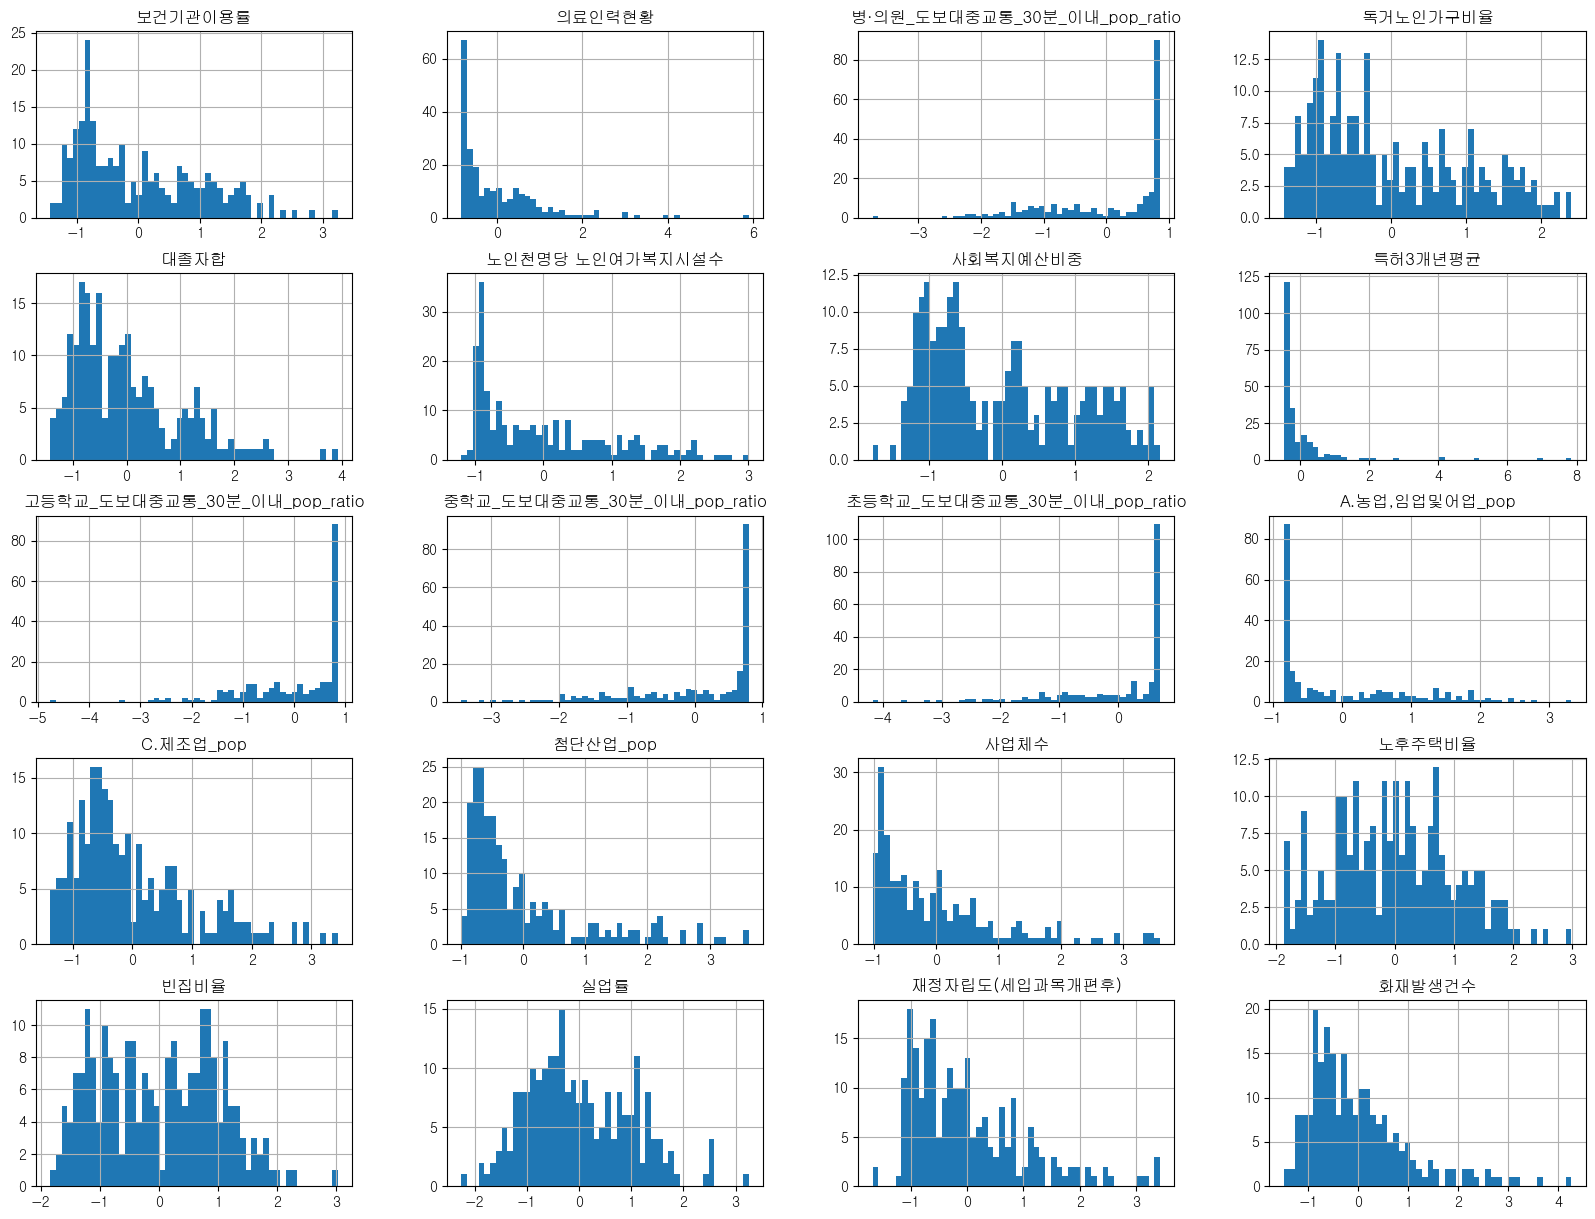

In [73]:
data_for_test_2_2.hist(bins=50, figsize=(20,15))

- 각 변수 간 상관관계 확인

In [74]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

import seaborn as sns
cor_mat = data_for_test_2_2.iloc[:,0:].corr()
plt.figure(figsize=(100, 100))
sns.heatmap(cor_mat, annot=True, cmap='RdYlGn_r',annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'})
plt.show()

In [75]:
cor_mat

,보건기관이용률,의료인력현황,병·의원_도보대중교통_30분_이내_pop_ratio,독거노인가구비율,대졸자합,노인천명당 노인여가복지시설수,사회복지예산비중,특허3개년평균,고등학교_도보대중교통_30분_이내_pop_ratio,중학교_도보대중교통_30분_이내_pop_ratio,초등학교_도보대중교통_30분_이내_pop_ratio,"A.농업,임업및어업_pop",C.제조업_pop,첨단산업_pop,사업체수,노후주택비율,빈집비율,실업률,재정자립도(세입과목개편후),화재발생건수
보건기관이용률,1.000000,-0.599545,-0.854178,0.780862,-0.662295,0.806845,-0.770015,-0.357827,-0.781506,-0.797535,-0.769012,0.808382,-0.338493,-0.602471,-0.634249,0.646342,0.668912,0.779323,-0.620359,-0.531881
의료인력현황,-0.599545,1.000000,0.586719,-0.599532,0.689721,-0.563810,0.562652,0.639407,0.554367,0.549053,0.509063,-0.555985,0.127006,0.660178,0.903549,-0.463503,-0.586800,-0.488890,0.658481,0.724911
병·의원_도보대중교통_30분_이내_pop_ratio,-0.854178,0.586719,1.000000,-0.841154,0.667842,-0.823830,0.799581,0.337211,0.904193,0.939403,0.921220,-0.882742,0.398794,0.571993,0.624228,-0.664202,-0.633882,-0.842456,0.610699,0.511279
독거노인가구비율,0.780862,-0.599532,-0.841154,1.000000,-0.695742,0.849657,-0.678418,-0.414618,-0.725456,-0.777349,-0.816577,0.893250,-0.463976,-0.610289,-0.680154,0.839641,0.722063,0.640794,-0.728164,-0.591650
대졸자합,-0.662295,0.689721,0.667842,-0.695742,1.000000,-0.669903,0.618413,0.486316,0.628335,0.626529,0.601386,-0.669090,-0.075873,0.871935,0.589931,-0.528777,-0.636072,-0.632703,0.642856,0.393732
노인천명당 노인여가복지시설수,0.806845,-0.563810,-0.823830,0.849657,-0.669903,1.000000,-0.764265,-0.316103,-0.749457,-0.779028,-0.802239,0.901726,-0.259899,-0.600139,-0.584130,0.634967,0.699279,0.780754,-0.577659,-0.433778
사회복지예산비중,-0.770015,0.562652,0.799581,-0.678418,0.618413,-0.764265,1.000000,0.283566,0.757641,0.750836,0.695603,-0.759634,0.250701,0.577309,0.534694,-0.478474,-0.704328,-0.787182,0.421173,0.338693
특허3개년평균,-0.357827,0.639407,0.337211,-0.414618,0.486316,-0.316103,0.283566,1.000000,0.310369,0.314776,0.294571,-0.326066,0.138506,0.531916,0.670116,-0.365833,-0.376968,-0.216698,0.580397,0.537061
고등학교_도보대중교통_30분_이내_pop_ratio,-0.781506,0.554367,0.904193,-0.725456,0.628335,-0.749457,0.757641,0.310369,1.000000,0.905276,0.857402,-0.791606,0.299837,0.549038,0.571811,-0.582000,-0.570452,-0.817723,0.547394,0.444260
중학교_도보대중교통_30분_이내_pop_ratio,-0.797535,0.549053,0.939403,-0.777349,0.626529,-0.779028,0.750836,0.314776,0.905276,1.000000,0.935035,-0.835240,0.373260,0.537847,0.583649,-0.601474,-0.580810,-0.806688,0.569172,0.474074


In [76]:
data_for_test_2_2.to_excel("data_for_FA_non65.xlsx")

- Varimax

In [77]:
from factor_analyzer import FactorAnalyzer

fac2_3 = FactorAnalyzer(n_factors=20, method='principal', rotation='varimax')
fac2_3.fit(data_for_test_2_2)

communalities2_3 = fac2_3.get_communalities()
loadings2_3 = fac2_3.loadings_
spa2_3 = fac2_3.get_uniquenesses()

In [78]:
## FA의 결과
pd.DataFrame(loadings2_3, index = data_for_test_2_2.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
보건기관이용률,-0.673842,-0.284776,-0.116801,0.196353,0.206606,-0.081306,-0.089722,0.093682,0.523119,-0.127397,0.054586,-0.009282,-0.012823,-0.230478,-0.008540,0.011873,-0.005676,-0.001479,-0.001079,0.005982
의료인력현황,0.305744,0.726974,-0.033259,-0.036907,-0.169148,0.249406,0.058282,-0.061756,-0.032424,0.127545,-0.034842,0.019599,0.384795,0.330167,0.031427,-0.022061,0.003072,-0.000318,0.007114,-0.002639
병·의원_도보대중교통_30분_이내_pop_ratio,0.864977,0.249895,0.152702,-0.188590,-0.141067,0.082944,0.080948,-0.024374,-0.079096,0.091141,0.003749,-0.019185,0.020853,0.197940,0.012391,0.012201,0.199558,0.016189,0.006349,-0.039612
독거노인가구비율,-0.585536,-0.298799,-0.241442,0.453274,0.274442,-0.108691,-0.108265,0.211892,0.039523,-0.035990,-0.067098,0.024271,-0.005106,-0.279144,-0.058365,0.086520,-0.020093,0.007362,-0.001043,0.251230
대졸자합,0.456637,0.237779,-0.174615,-0.195505,-0.148296,0.180053,0.112647,-0.064723,-0.053318,0.074052,-0.083363,-0.004802,0.074048,0.701179,0.282690,-0.031658,0.004687,-0.000278,-0.001766,-0.039581
노인천명당 노인여가복지시설수,-0.696672,-0.200274,-0.036105,0.229253,0.260566,-0.070873,-0.085615,0.520307,0.093837,-0.109121,0.045667,0.005737,-0.025136,-0.211768,-0.007338,0.034224,-0.001430,0.002611,-0.003653,0.012465
사회복지예산비중,0.673153,0.161076,0.071453,-0.065765,-0.297881,0.069341,-0.023555,-0.079414,-0.089477,0.591253,-0.054201,0.016939,0.037962,0.220016,0.008520,-0.016777,0.005146,0.002758,0.004509,-0.004349
특허3개년평균,0.087857,0.395412,0.042689,-0.083607,-0.081567,0.872927,0.084202,-0.022459,-0.022859,0.026061,-0.005636,0.005553,0.020010,0.221509,0.007985,-0.006606,0.001509,-0.000354,0.000072,-0.005368
고등학교_도보대중교통_30분_이내_pop_ratio,0.867310,0.218633,0.059900,-0.132402,-0.102172,0.087096,0.085035,0.031845,-0.030785,0.079089,0.001501,0.335153,0.030001,0.173596,-0.004887,0.042358,-0.004374,0.006349,0.004818,0.010809
중학교_도보대중교통_30분_이내_pop_ratio,0.903892,0.227180,0.132417,-0.126921,-0.107583,0.086334,0.081849,0.013662,-0.019305,0.032358,0.086580,-0.050942,0.018940,0.172778,0.008283,0.067495,-0.075459,0.139502,0.010357,0.014254


In [79]:
fac2_3._get_factor_variance(loadings2_3)[0]

array([7.11259187, 3.12247278, 1.25063378, 1.38070003, 1.22749422,
       1.13257563, 0.52991306, 0.42833259, 0.33416193, 0.47258346,
       0.23639107, 0.13233343, 0.18732835, 2.0026889 , 0.10886487,
       0.12439446, 0.05081652, 0.04823172, 0.04784852, 0.0696428 ])

In [80]:
fac2_3._get_factor_variance(loadings2_3)[1]

array([0.35562959, 0.15612364, 0.06253169, 0.069035  , 0.06137471,
       0.05662878, 0.02649565, 0.02141663, 0.0167081 , 0.02362917,
       0.01181955, 0.00661667, 0.00936642, 0.10013445, 0.00544324,
       0.00621972, 0.00254083, 0.00241159, 0.00239243, 0.00348214])

Text(0.5, 1.0, 'Scree plot')

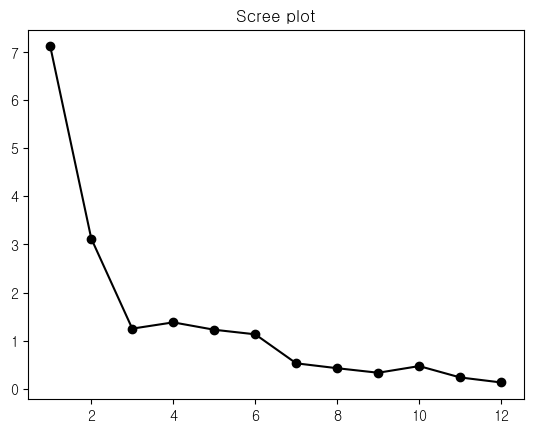

In [81]:
plt.plot(range(1,13), fac2_3.get_factor_variance()[0][:12],"-o", color = 'black')
plt.title("Scree plot")

In [82]:
pd.DataFrame(fac2_3.get_factor_variance()[1])

,0
0,0.355630
1,0.156124
2,0.062532
3,0.069035
4,0.061375
5,0.056629
6,0.026496
7,0.021417
8,0.016708
9,0.023629


In [83]:
from factor_analyzer import FactorAnalyzer

fac2_4 = FactorAnalyzer(n_factors=2, method='principal', rotation='varimax')
fac2_4.fit(data_for_test_2_2)

loadings2_4 = fac2_4.loadings_

In [84]:
pd.DataFrame(loadings2_4, index = data_for_test_2_2.columns)

,0,1
보건기관이용률,-0.797543,-0.412604
의료인력현황,0.326001,0.835765
병·의원_도보대중교통_30분_이내_pop_ratio,0.902487,0.339541
독거노인가구비율,-0.758566,-0.513221
대졸자합,0.540459,0.596796
노인천명당 노인여가복지시설수,-0.834029,-0.349732
사회복지예산비중,0.806128,0.269954
특허3개년평균,0.041507,0.817996
고등학교_도보대중교통_30분_이내_pop_ratio,0.856145,0.291092
중학교_도보대중교통_30분_이내_pop_ratio,0.884423,0.292724


In [85]:
minus_factors_2 = pd.DataFrame(fac2_3.transform(data_for_test_2_2)[:,0:2], index=data_for_test.index, columns= ["factor1","factor2"])

In [86]:
minus_factors_2.head()

,factor1,factor2
Unnamed: 0,,
서울종로구,0.384663,0.413531
서울중구,0.282845,0.083804
서울용산구,0.408170,-0.467049
서울성동구,0.346753,-0.172520
서울광진구,0.439665,-0.024276


In [87]:
minus_factors_2.to_excel("factors_2.xlsx") ##결과 저장

array([[<AxesSubplot:title={'center':'factor1'}>,
        <AxesSubplot:title={'center':'factor2'}>]], dtype=object)

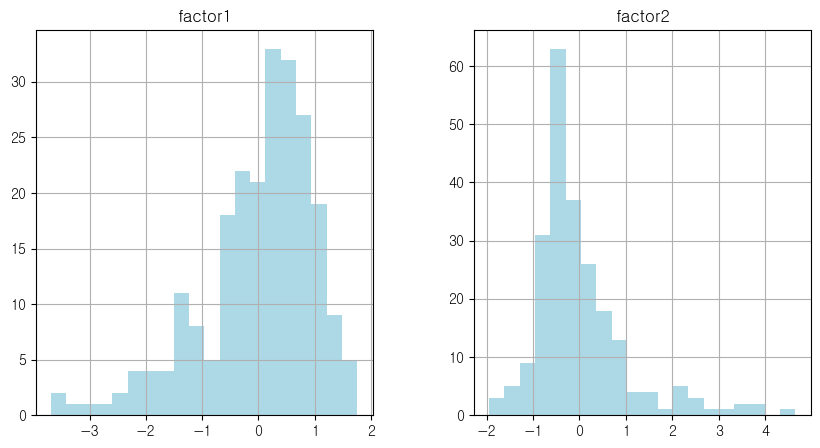

In [88]:
minus_factors_2.hist(bins=20, figsize=(10,5),color = "lightblue")

- Equamax

In [89]:
fac2_4 = FactorAnalyzer(n_factors=10, method='principal', rotation='equamax')
fac2_4.fit(data_for_test_2_2)

communalities2_4 = fac2_4.get_communalities()
loadings2_4 = fac2_4.loadings_
spa2_4 = fac2_4.get_uniquenesses()

In [90]:
## FA의 결과
pd.DataFrame(loadings2_4, index = data_for_test_2_2.columns)

,0,1,2,3,4,5,6,7,8,9
보건기관이용률,-0.888125,-0.082550,-0.030395,0.039173,0.040035,0.003790,-0.023406,-0.008452,0.353647,-0.056470
의료인력현황,0.640391,0.611782,-0.151387,0.120316,-0.037127,0.236036,0.106648,-0.039946,0.114695,0.215866
병·의원_도보대중교통_30분_이내_pop_ratio,0.961867,0.008630,0.089490,0.022833,0.071442,-0.025331,-0.049618,0.119975,0.008232,-0.021051
독거노인가구비율,-0.887436,-0.098570,-0.144861,0.293626,0.116332,-0.042304,-0.082937,0.137270,-0.136679,0.050596
대졸자합,0.762172,0.060477,-0.409745,-0.076972,0.000454,0.161639,0.359741,-0.014233,0.074727,0.159004
노인천명당 노인여가복지시설수,-0.907885,0.018779,0.045501,0.027891,0.082605,0.021080,0.057032,0.329475,0.008537,0.046962
사회복지예산비중,0.841747,-0.053142,0.002622,0.114859,-0.160463,-0.010472,-0.149977,0.020877,-0.055609,0.422293
특허3개년평균,0.377856,0.300612,-0.023155,-0.021289,-0.024924,0.871675,0.067499,0.000047,-0.001937,-0.003119
고등학교_도보대중교통_30분_이내_pop_ratio,0.906739,-0.009222,0.006895,0.074042,0.107376,-0.021671,-0.078706,0.283799,-0.006933,-0.031047
중학교_도보대중교통_30분_이내_pop_ratio,0.931406,-0.012655,0.079668,0.088208,0.103720,-0.025298,-0.072532,0.208191,0.087658,-0.104363


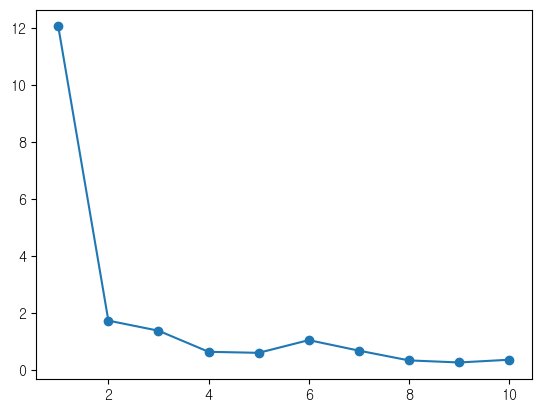

In [91]:
plt.plot(range(1,11),fac2_4.get_factor_variance()[0], "-o")

In [92]:
pd.DataFrame(fac2_4.get_factor_variance()[1])

,0
0,0.603515
1,0.086707
2,0.069027
3,0.031948
4,0.030148
5,0.052481
6,0.034011
7,0.016862
8,0.013225
9,0.017989


In [93]:
minus_factors_new_2 = pd.DataFrame(fac2_4.transform(data_for_test_2_2)[:,0], index=data_for_test_2_2.index, columns= ["factor1"])

In [94]:
minus_factors_new_2.head()

,factor1
Unnamed: 0,
서울종로구,1.041014
서울중구,1.058439
서울용산구,1.078650
서울성동구,1.109396
서울광진구,1.116972


In [95]:
minus_factors_new_2.to_excel("minus_factors_new_2.xlsx")

PCA

In [96]:
pca4 = PCA(n_components=20)
pca4.fit(data_for_test_2_2)

PCA(n_components=20)

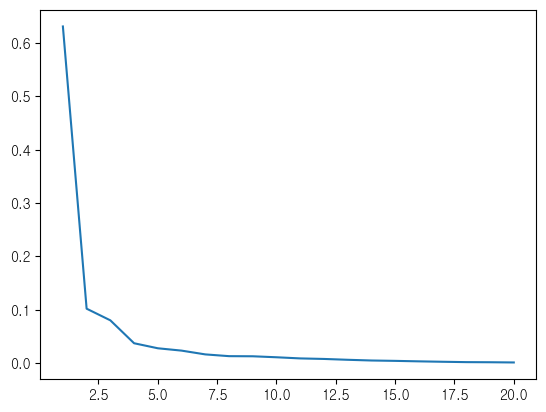

In [97]:
plt.plot(range(1,21), pca4.explained_variance_ratio_)

In [98]:
pd.DataFrame(pca4.components_.T, index= data_for_test_2_2.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
보건기관이용률,0.249863,0.095544,0.009252,0.035424,-0.106623,0.057618,0.067974,0.280784,0.492483,0.354740,-0.530160,-0.146693,-0.340552,-0.086040,0.025684,0.131510,-0.108644,-0.015107,-0.033538,-0.059101
의료인력현황,-0.212797,0.338084,-0.090449,-0.308894,0.130750,-0.155644,-0.015808,0.125487,0.007141,0.408562,-0.071678,-0.029240,0.536716,-0.034393,-0.217515,0.041133,-0.008264,-0.203668,-0.346096,0.083383
병·의원_도보대중교통_30분_이내_pop_ratio,-0.261615,-0.180115,0.033984,-0.123618,-0.119087,0.032585,-0.071341,-0.071549,0.095881,-0.006044,0.075843,0.047065,0.005946,0.155660,0.088052,-0.001537,-0.776429,-0.209340,-0.037208,-0.399950
독거노인가구비율,0.257688,0.022593,-0.121219,-0.318940,-0.004986,0.084928,-0.185347,-0.075587,-0.182038,-0.124434,-0.114080,-0.100001,-0.025415,-0.005398,-0.348408,0.155059,0.257186,0.008899,0.021748,-0.696366
대졸자합,-0.221938,0.114573,-0.356579,0.184876,-0.243747,-0.046864,-0.118280,-0.035248,-0.142013,0.318905,-0.124968,0.378720,0.067913,0.079322,0.497785,0.108887,0.225070,0.070155,0.153210,-0.262547
노인천명당 노인여가복지시설수,0.247733,0.146130,0.067298,-0.119054,-0.107961,0.115100,-0.407605,-0.381401,0.155246,0.060921,-0.199788,0.269744,0.047662,0.379898,-0.110719,-0.464468,-0.043336,0.113978,-0.011828,0.178820
사회복지예산비중,-0.228153,-0.179729,-0.149019,-0.151854,0.420148,0.150991,0.038890,-0.324583,-0.105961,0.416047,0.063760,-0.266257,-0.420787,0.293004,0.021887,0.026119,0.129460,-0.131872,0.010518,0.081073
특허3개년평균,-0.145135,0.445326,-0.018738,-0.108771,-0.150486,0.695077,0.451822,-0.108904,-0.011564,-0.189827,-0.030991,0.021427,-0.005015,0.040010,0.058946,-0.001915,0.005295,-0.024682,-0.057687,-0.000031
고등학교_도보대중교통_30분_이내_pop_ratio,-0.243036,-0.188398,-0.026117,-0.238542,-0.208711,0.054973,-0.190843,-0.239139,0.207535,-0.097690,-0.128267,-0.425652,0.129443,-0.464045,0.304432,-0.310925,0.183877,-0.045502,-0.005803,-0.007481
중학교_도보대중교통_30분_이내_pop_ratio,-0.249740,-0.199134,0.030383,-0.198733,-0.221987,0.073588,-0.138612,-0.000345,0.306182,-0.057000,0.145169,0.005490,0.015066,0.221836,-0.069567,0.461435,0.108487,0.547702,-0.271391,0.113801


In [99]:
pca4.n_components_

20